Here we are estimating MI for a continuous target variable.

- MI between two random variables is a non-negative value, which measures the dependancy between the variable. It is equal to zero iff two random variables are independant

- Higher value means higher dependancy
- In nutshell, MI measures the amount of information one can obtain from one random varaible given another.
- In otherwords, MI measures the reduction in uncertainity for one variable given a known value of another variable.

In [2]:
import pandas as pd
from  sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [4]:
# Looking for null values
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [6]:
# Split into train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('MedInc', axis=1), df['MedInc'], test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape)

(14448, 7) (6192, 7)


In [7]:
# Feature Selection
from sklearn.feature_selection import mutual_info_regression

mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

array([0.03010262, 0.33450409, 0.04447344, 0.01845239, 0.05424819,
       0.13082552, 0.16039354])

In [8]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

AveRooms      0.334504
Longitude     0.160394
Latitude      0.130826
AveOccup      0.054248
AveBedrms     0.044473
HouseAge      0.030103
Population    0.018452
dtype: float64

<AxesSubplot:>

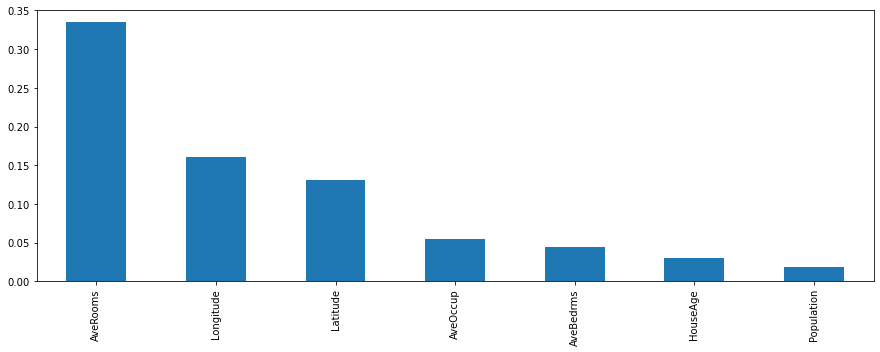

In [10]:
mutual_info.sort_values(ascending=False).plot(kind='bar', figsize=(15, 5))

In [13]:
from sklearn.feature_selection import SelectPercentile

# Selecting the top 25 percentile
sele_top_cols = SelectPercentile(mutual_info_regression, percentile=25)
sele_top_cols.fit(X_train, y_train)

SelectPercentile(percentile=25,
                 score_func=<function mutual_info_regression at 0x7f1b63b058b0>)

In [14]:
# A boolean mask
sele_top_cols.get_support()

array([False,  True, False, False, False, False,  True])

In [15]:
X_train.columns[sele_top_cols.get_support()]

Index(['AveRooms', 'Longitude'], dtype='object')